**Sebastián González Juárez**
## Proyecto 3



Comprobar de forma analítica si se logra obtener el estado cuántico 1011


 Caso 2: n = 4, s = "1011"
circuito_4 = bernstein_vazirani(n=4, s="1011")
circuito_4.draw('mpl')  # Dibuja el circuito (se mostrará en la salida)

In [1]:
!pip install qiskit
!pip install qiskit[visualization]
!pip install qiskit-aer
!pip install qiskit-ibm-runtime

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from qiskit_aer import AerSimulator # Simulador
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Operator, Statevector
from qiskit.visualization import plot_histogram

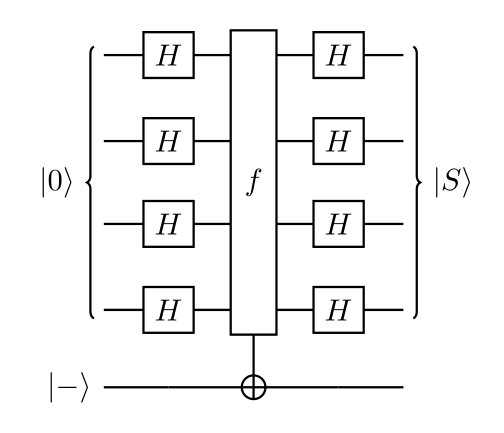

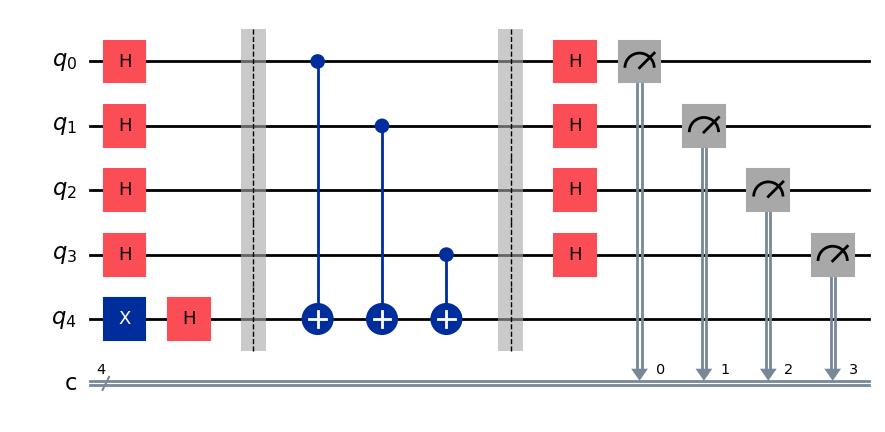

In [5]:
def bernstein_vazirani(n, s, shots=8092):
    """
    Implementa y ejecuta el algoritmo de Bernstein-Vazirani para un número arbitrario de qubits n
    y una cadena secreta s de longitud n.
    """
    assert len(s) == n, "La longitud de s debe coincidir con n"

    # Crear el circuito con (n qubits + 1 auxiliar) y n bits clásicos
    bv_circuit = QuantumCircuit(n+1, n)

    # Inicializar el qubit auxiliar en |->
    bv_circuit.x(n)
    bv_circuit.h(n)

    # Aplicar Hadamard a los primeros n qubits
    bv_circuit.h(range(n))
    bv_circuit.barrier()

    # Aplicar el oráculo: CNOT donde s[i] == '1'
    s_invertida = s[::-1]  # Invertir s por el orden de los qubits en Qiskit
    for q in range(n):
        if s_invertida[q] == '1':
            bv_circuit.cx(q, n)

    bv_circuit.barrier()

    # Aplicar Hadamard nuevamente a los primeros n qubits
    bv_circuit.h(range(n))

    # Medir los n qubits en los n bits clásicos
    bv_circuit.measure(range(n), range(n))

    return bv_circuit

# Caso 2: n = 4, s = "1011"
circuito_4 = bernstein_vazirani(n=4, s="1011")
circuito_4.draw('mpl')  # Dibuja el circuito (se mostrará en la salida)

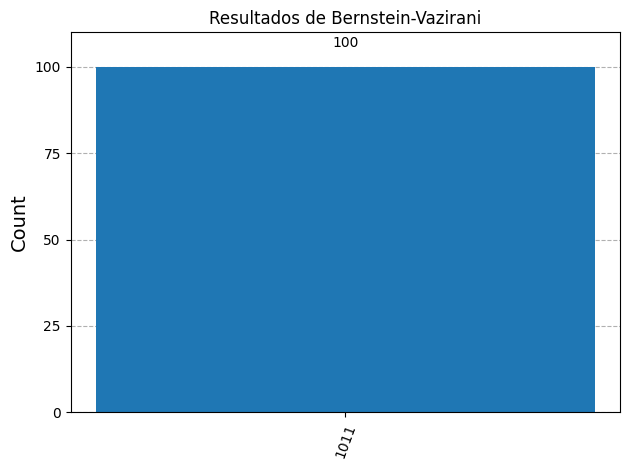

In [7]:
# Número de shots (veces que se ejecuta el circuito)
shots = 100

# Crear el simulador
simulator = AerSimulator()

# Transpilar el circuito para optimizarlo en el simulador
compiled_circuit = transpile(circuito_4, simulator)

# Ejecutar el circuito en el simulador
job = simulator.run(compiled_circuit, shots=shots)

# Obtener resultados
result = job.result()
counts = result.get_counts()

# Dibujar histograma
plot_histogram(counts, title="Resultados de Bernstein-Vazirani")